In [1]:
import sys
sys.path.append('../src')

from module.module import Linear
from module.activation import TanH, Sigmoide

from loss.loss import BCELoss
from networks.optim import Optim
from networks.sequentiel import Sequentiel

from utils.generation import generate_linear_data, generate_data_gauss
from utils.plots import plot_net
from utils.evaluation import accuracy

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt

In [2]:
def affichage(X_train, Xhat, y_train, type_affichage="tsne", n_components=2):
    if type_affichage=="tsne":
        tsne = TSNE(n_components = n_components, random_state=0)
        aff_train = tsne.fit_transform(X_train)

        tsne = TSNE(n_components = n_components, random_state=0)
        aff_hat = tsne.fit_transform(Xhat)

    if type_affichage=="pca":
        tsne = PCA(n_components = n_components, random_state=0)
        aff_train = tsne.fit_transform(X_train)

        tsne = PCA(n_components = n_components, random_state=0)
        aff_hat = tsne.fit_transform(Xhat)

    if n_components == 2:
        fig = plt.figure(figsize=(12, 6))

        ax1 = fig.add_subplot(121)
        ax1.scatter(aff_train[:, 0], aff_train[:, 1], c=y_train)
        ax1.set_xlabel('Dimension 1')
        ax1.set_ylabel('Dimension 2')
        ax1.set_title(type_affichage.upper() + " Visualization for X_train")

        ax2 = fig.add_subplot(122)
        ax2.scatter(aff_hat[:, 0], aff_hat[:, 1], c=y_train)
        ax2.set_xlabel('Dimension 1')
        ax2.set_ylabel('Dimension 2')
        ax2.set_title(type_affichage.upper() + " Visualization for Xhat")

    if n_components == 3:
        fig = plt.figure(figsize=(12, 12))
        ax1 = fig.add_subplot(121, projection='3d')
        ax1.scatter(aff_train[:, 0], aff_train[:, 1], aff_train[:, 2], c=y_train)
        ax1.set_xlabel('Dimension 1')
        ax1.set_ylabel('Dimension 2')
        ax1.set_zlabel('Dimension 3')
        ax1.set_title(type_affichage.upper() + " Visualization in 3D for X_train")

        ax2 = fig.add_subplot(122, projection='3d')
        ax2.scatter(aff_hat[:, 0], aff_hat[:, 1], aff_hat[:, 2], c=y_train)
        ax2.set_xlabel('Dimension 1')
        ax2.set_ylabel('Dimension 2')
        ax2.set_zlabel('Dimension 3')
        ax2.set_title(type_affichage.upper() + " Visualization in 3D for Xhat")

    plt.tight_layout()
    plt.show()


In [3]:
def plot_usps_predictions(X, Xhat, i):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
    axs[0].imshow(X[i].reshape((16, 16)))
    axs[0].set_title('Image originale')
    axs[1].imshow(Xhat[i].reshape((16, 16)))
    axs[1].set_title('Image reconstruite')
    plt.show()

In [4]:
data = pkl.load(open("../data/usps.pkl",'rb')) 

In [5]:
X_train = data["X_train"]
y_train = data["Y_train"]

X_test = data["X_test"]
y_test = data["Y_test"]

In [6]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# scaler = StandardScaler()
# X_test = scaler.fit_transform(X_test)

100%|██████████| 150/150 [00:35<00:00,  4.18it/s]

Training completed.


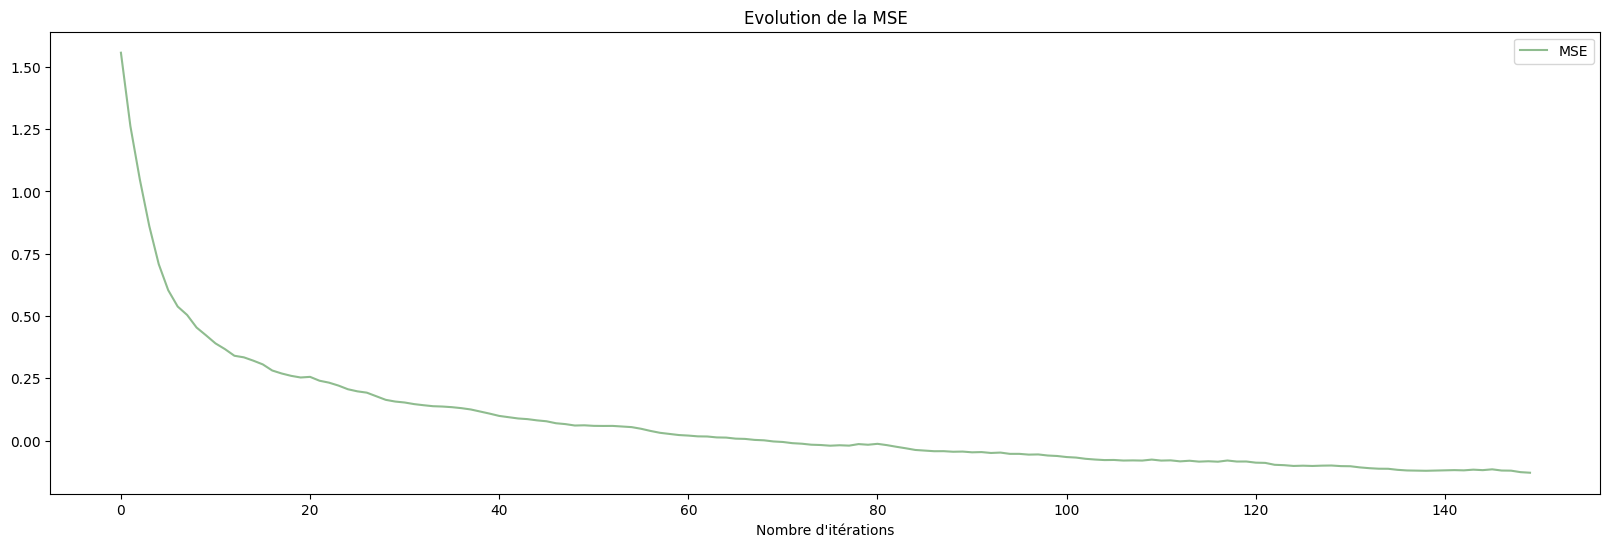

In [7]:
input_neurons = X_train.shape[1]
hidden_neurons = 100
output_neurons = 20

encoder = [
    Linear(input_neurons, hidden_neurons, bias=True),
    TanH(),
    Linear(hidden_neurons, output_neurons, bias=True),
    TanH()
]

decoder = [
    Linear(output_neurons, hidden_neurons, bias=True),
    TanH(),
    Linear(hidden_neurons, input_neurons, bias=True),
    Sigmoide()
]

net = Sequentiel([*encoder, *decoder])

optim = Optim(net, BCELoss(), eps=1e-5)
optim.SGD(X_train, X_train, batch_size=len(X_train), epochs=150, verbose=False)

plot_net(X_train, y_train, net, optim.train_loss, net_type="auto_encodeur")
Xhat = net(X_train)

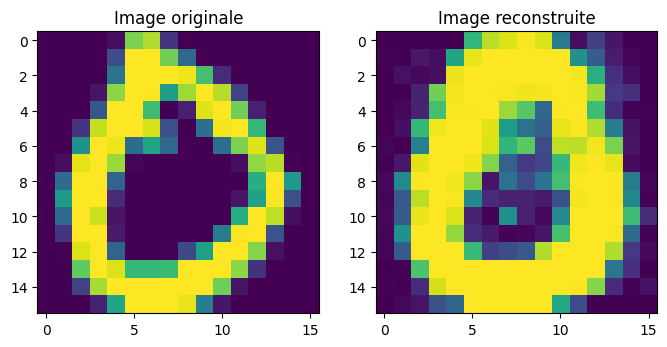

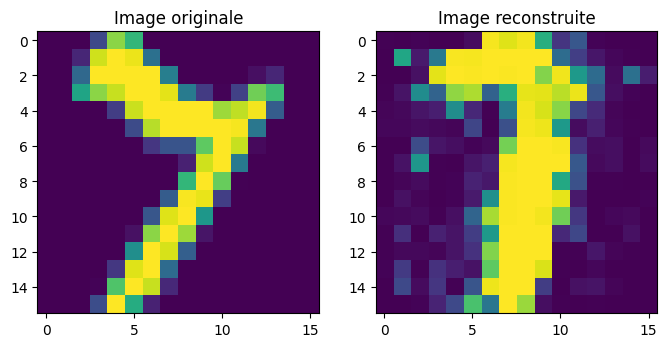

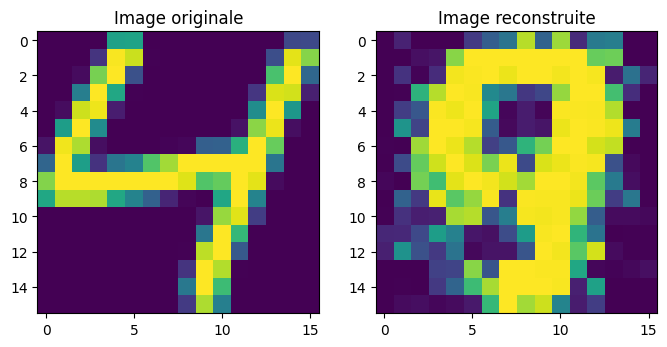

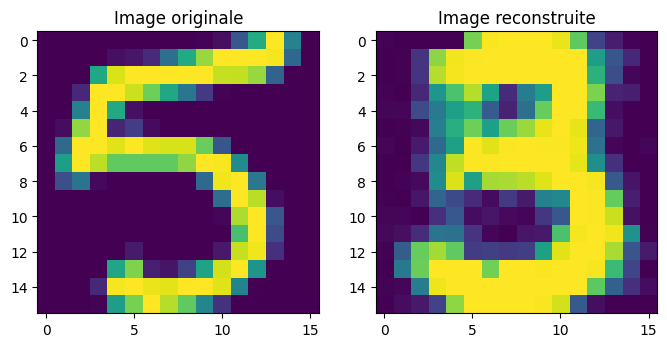

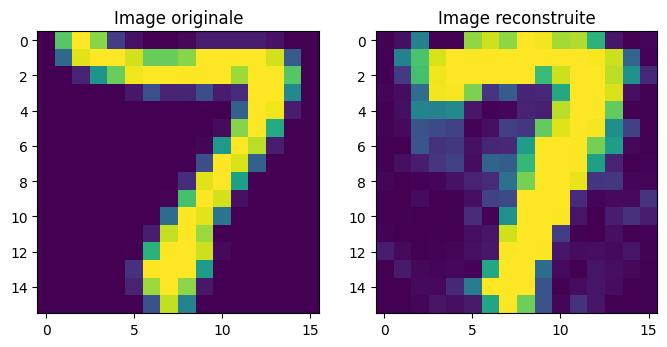

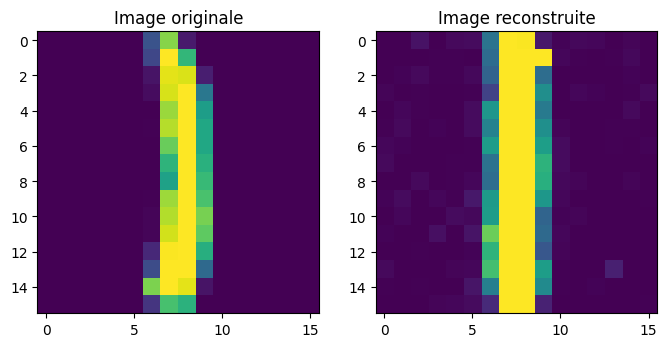

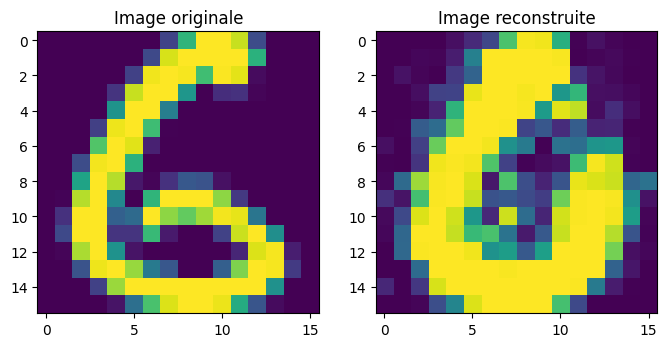

In [8]:
for i in [7, 10, 25, 29, 27, 17, 100]:
    plot_usps_predictions(X_train, Xhat, i)

In [9]:
encoder_net = Sequentiel(encoder)
x_encoder = encoder_net(X_train)

kmeans = KMeans(n_clusters=10, random_state=0)

labels = kmeans.fit_predict(x_encoder)


c:\Users\gouhe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


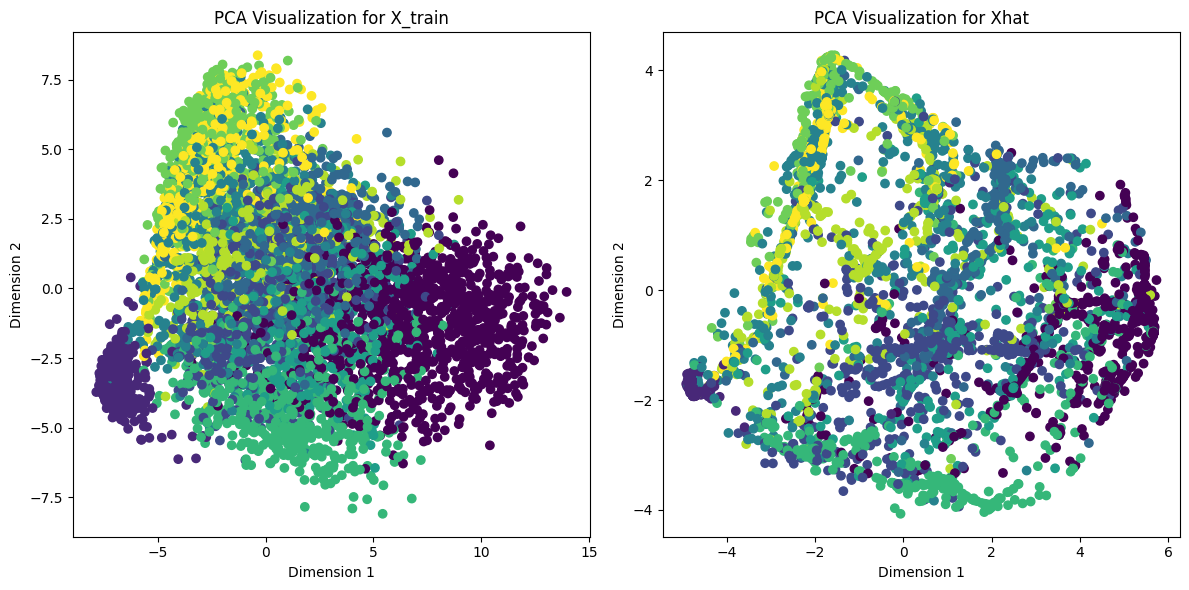

In [10]:
affichage(X_train, Xhat, y_train, type_affichage="pca", n_components=2)

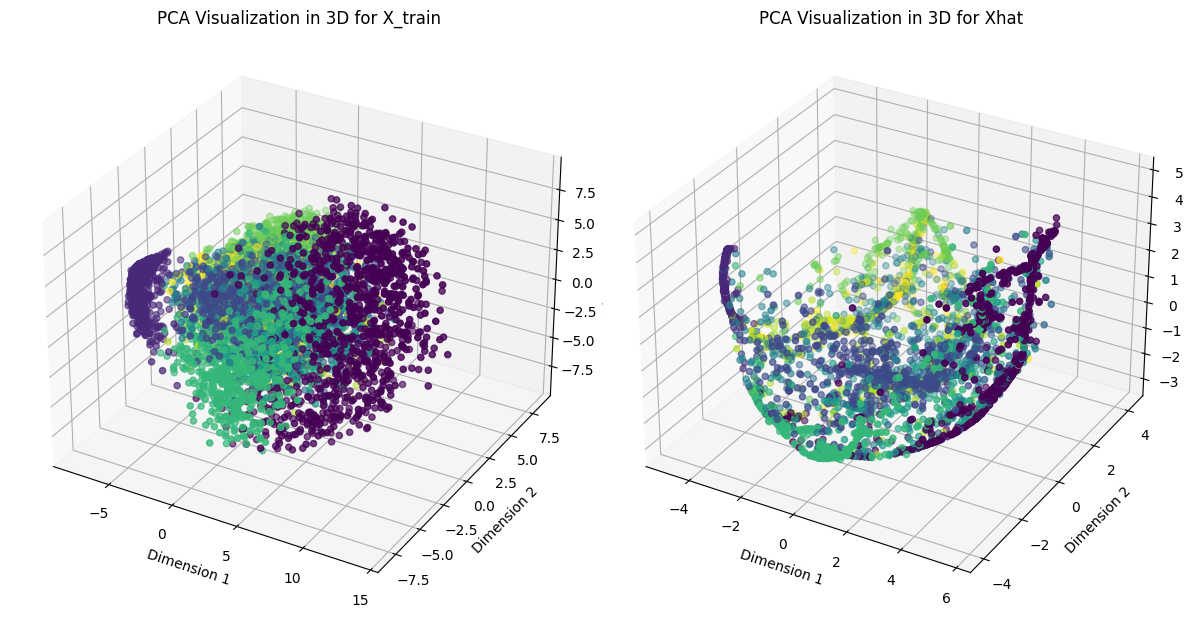

In [11]:
affichage(X_train, Xhat, y_train, type_affichage="pca", n_components=3)

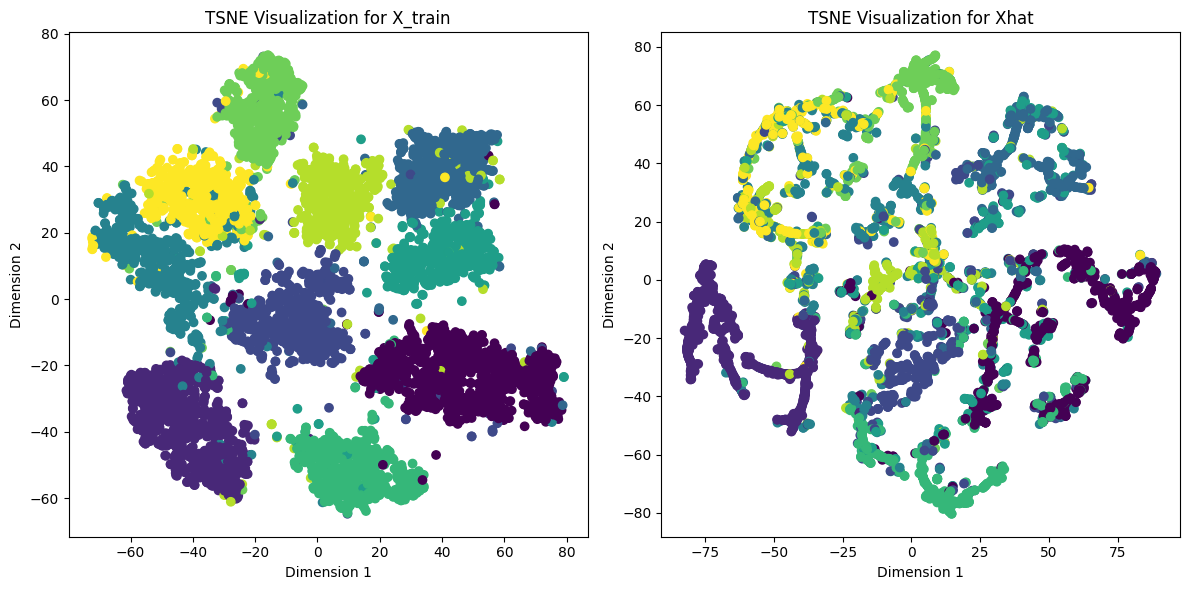

In [12]:
affichage(X_train, Xhat, y_train, type_affichage="tsne", n_components=2)

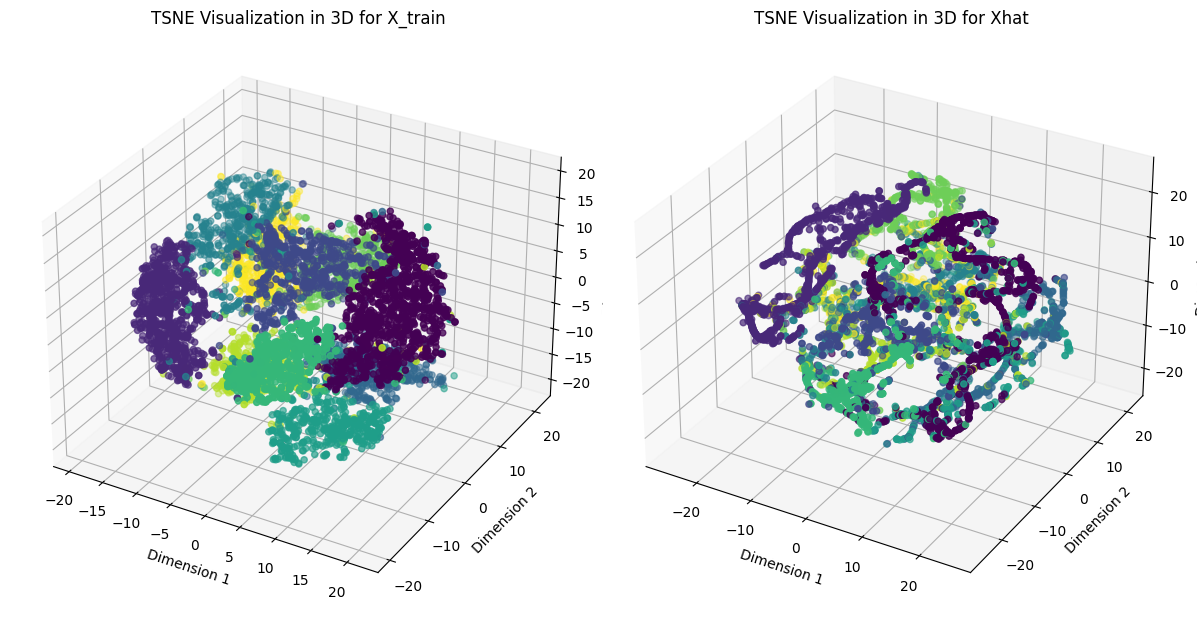

In [13]:
affichage(X_train, Xhat, y_train, type_affichage="tsne", n_components=3)


# --------------
# --------------
# --------------

100%|██████████| 150/150 [00:42<00:00,  3.53it/s]

Training completed.


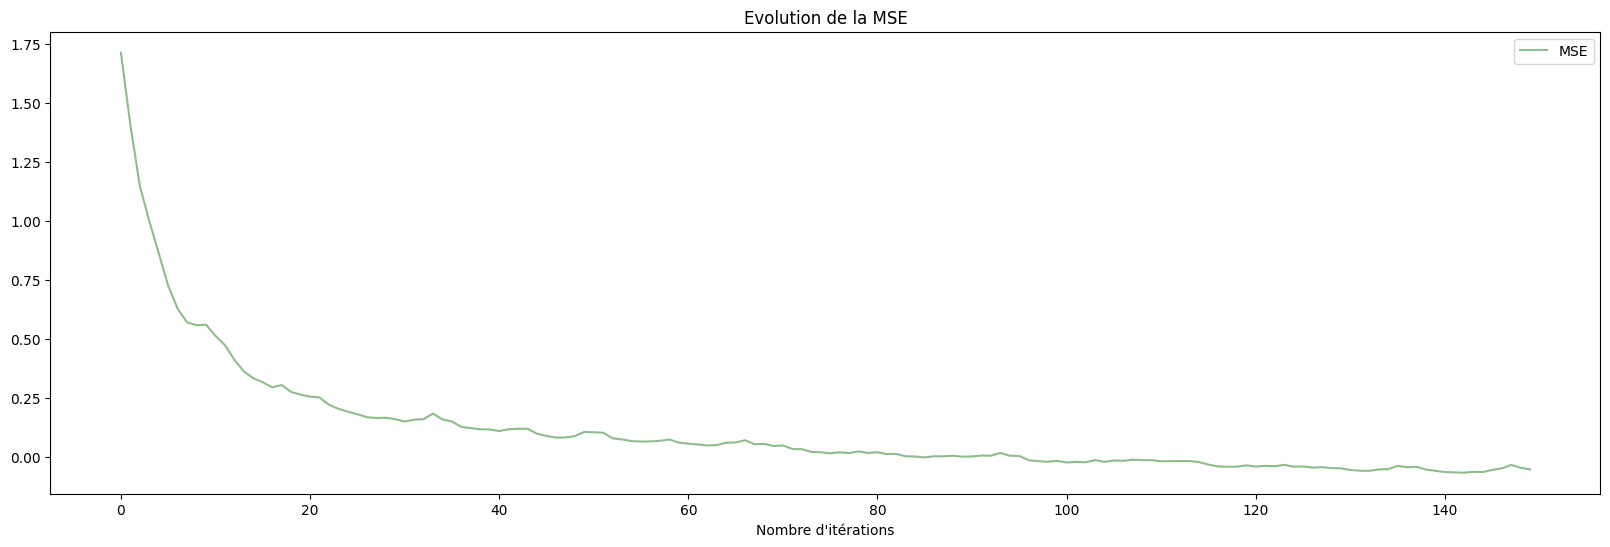

In [14]:
input_neurons = X_train.shape[1]
h1 = 128
h2 = 64
h3 = 10

encoder = [
    Linear(input_neurons, h1, bias=True),
    TanH(),
    Linear(h1, h2, bias=True),
    TanH(),
    Linear(h2, h3, bias=True),
    TanH()
]

decoder = [
    Linear(h3, h2, bias=True),
    TanH(),
    Linear(h2, h1, bias=True),
    TanH(),
    Linear(h1, input_neurons, bias=True),
    Sigmoide()
]

net = Sequentiel([*encoder, *decoder])

optim = Optim(net, BCELoss(), eps=1e-5)
optim.SGD(X_train, X_train, batch_size=len(X_train), epochs=150, verbose=False)

plot_net(X_train, y_train, net, optim.train_loss, net_type="auto_encodeur")
Xhat = net(X_train)

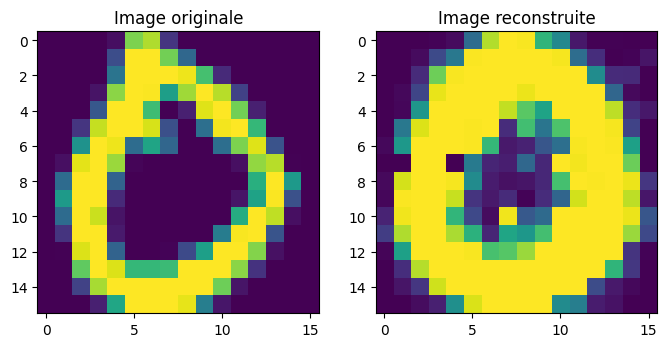

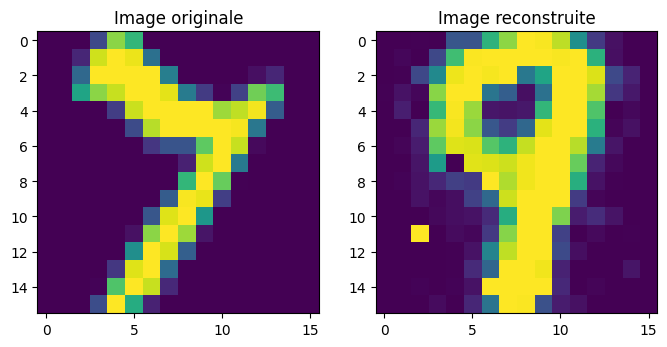

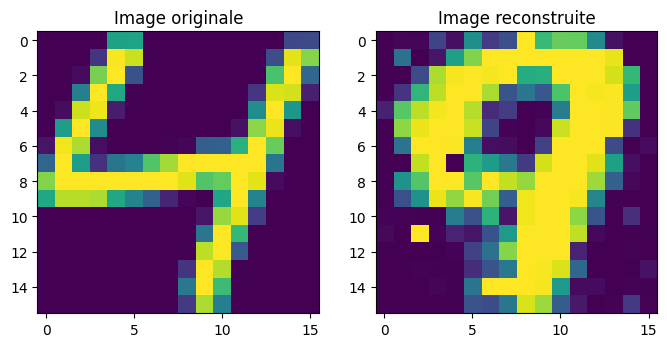

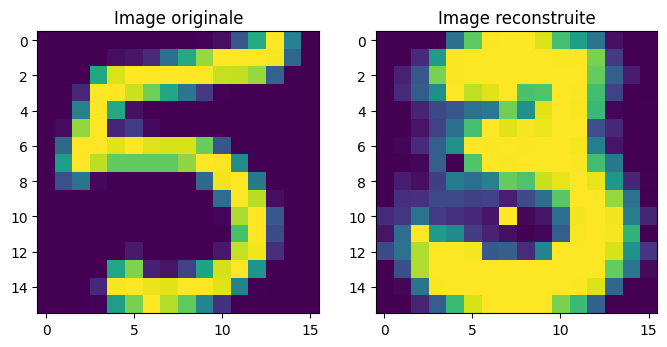

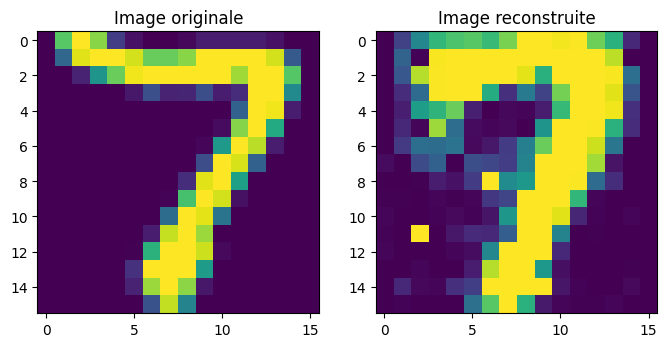

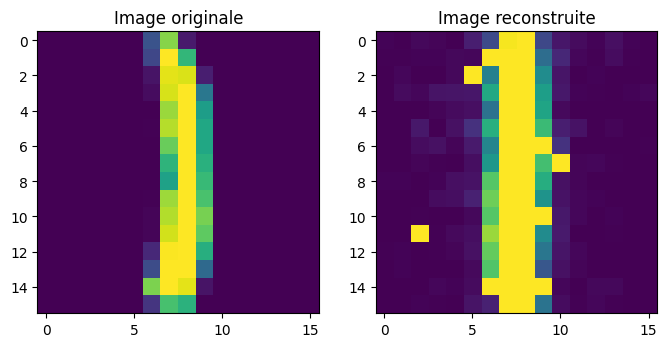

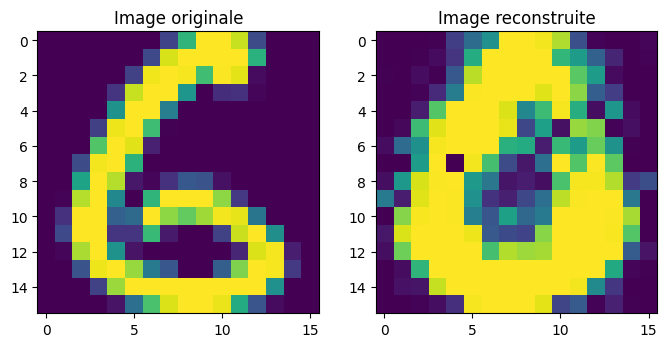

In [15]:
for i in [7, 10, 25, 29, 27, 17, 100]:
    plot_usps_predictions(X_train, Xhat, i)